In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_reviews = pd.read_csv('eda_beats_data.csv')
df_reviews.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,word_count,product_category
0,R1KTX4USE1JN2Y,B08YRT9T38,"5.0 out of 5 stars Beautiful Sound, Beautiful ...",Ethan Barbee,5,This is the third different B&O speaker I've b...,"Reviewed in the United States September 2, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,1,0,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,96,Speaker
1,R2HAQUWSTPUU1B,B08YRT9T38,"5.0 out of 5 stars Great sound, compact, very ...",Bridget Brooks,5,I typically goes to Bose speakers as my first ...,"Reviewed in the United States July 22, 2024",AEK6OWCPNNGR5I2IFKONWQBWN5GQ,1,1,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,124,Speaker
2,R2OXTERJCBYAF0,B08YRT9T38,"5.0 out of 5 stars Nice little speaker, sweet ...",P. Mumford,5,I bought this to take into my backyard in the ...,"Reviewed in the United States July 27, 2024",AEQ34ZA5DNYEPTKOIOMUUUKHPUWQ,1,2,Color: Grey MistStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,121,Speaker
3,R2N9LGOT33J14T,B08YRT9T38,4.0 out of 5 stars A Posh Music speaker!,RT - Gadget Guy,4,B&O makes posh high end audio gear….gear which...,"Reviewed in the United States March 3, 2024",AE6TVTGGPRUEMJMSIV5SX6NDA2PA,1,7,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,637,Speaker
4,R2X7LV4K100RNI,B08YRT9T38,5.0 out of 5 stars Natural true sounding speaker.,hubbabubba66,5,Sound quality is very good. The app provides p...,"Reviewed in the United States June 24, 2024",AGDYLA7QS2TXWBTITQ2OMV7XNSQQ,1,4,Color: Black AnthraciteStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,96,Speaker


In [ ]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the content column
df_reviews['sentiment'] = df_reviews['content'].apply(get_sentiment)

# Classify the sentiment as positive, negative, or neutral
df_reviews['sentiment_category'] = df_reviews['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [ ]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis to the content of each review
df_reviews['sentiment_score'] = df_reviews['content'].apply(get_sentiment)

# Preview the dataset with the new sentiment_score column
print(df_reviews[['content', 'sentiment_score']].head())

# Define sentiment categories based on the sentiment score
df_reviews['sentiment_category'] = df_reviews['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Preview the sentiment categories
print(df_reviews[['content', 'sentiment_score', 'sentiment_category']].head())

# Calculate the overall average sentiment score
overall_sentiment_score = df_reviews['sentiment_score'].mean()
print(f"Overall Average Sentiment Score: {overall_sentiment_score}")

# Count the number of reviews in each sentiment category
sentiment_distribution = df_reviews['sentiment_category'].value_counts()
print("\nSentiment Category Distribution:")
print(sentiment_distribution)

                                             content  sentiment_score
0  This is the third different B&O speaker I've b...         0.374111
1  I typically goes to Bose speakers as my first ...         0.168778
2  I bought this to take into my backyard in the ...         0.298258
3  B&O makes posh high end audio gear….gear which...         0.183009
4  Sound quality is very good. The app provides p...         0.210357
                                             content  sentiment_score  \
0  This is the third different B&O speaker I've b...         0.374111   
1  I typically goes to Bose speakers as my first ...         0.168778   
2  I bought this to take into my backyard in the ...         0.298258   
3  B&O makes posh high end audio gear….gear which...         0.183009   
4  Sound quality is very good. The app provides p...         0.210357   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  
Ove

<ipython-input-5-06d0bf710930>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_reviews, palette='viridis')


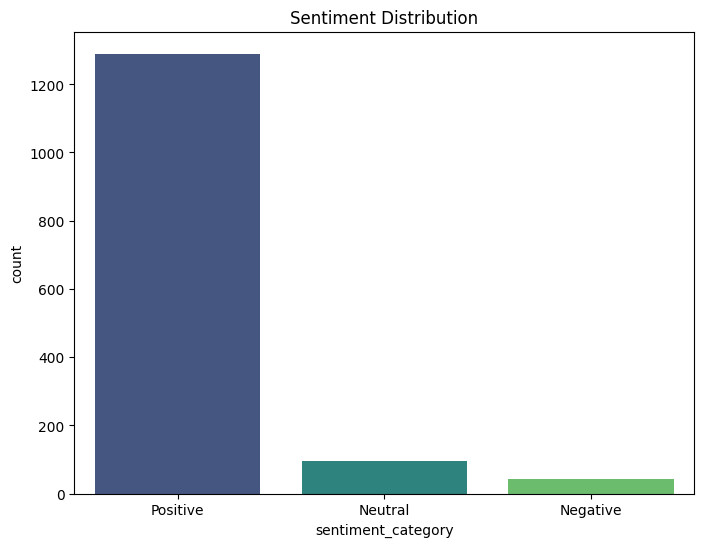

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df_reviews, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
sentiment_analysis = df_reviews.groupby('sentiment_category').agg({
    'rating': 'mean',
    'helpful_count': 'mean',
    'is_verified': 'mean',
    'word_count': 'mean'
}).reset_index()

<ipython-input-7-0b668daf1df5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_category', y='rating', data=sentiment_analysis, palette='coolwarm')


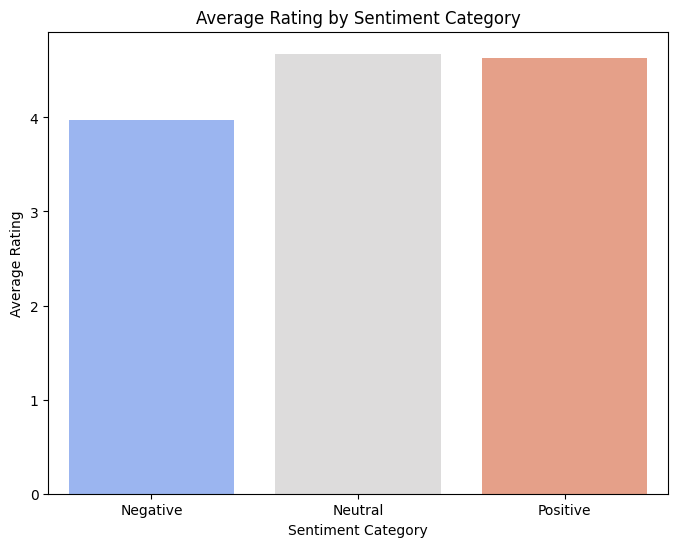

In [ ]:
# Bar plot for average rating by sentiment category
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='rating', data=sentiment_analysis, palette='coolwarm')
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Rating')
plt.show()

**Sentiment Analysis by Category**

In [ ]:
# Now, let's calculate sentiment distribution for each category
earbuds_sentiment = df_reviews[df_reviews['product_category'] == 'Earbuds']['sentiment_category'].value_counts()
speakers_sentiment = df_reviews[df_reviews['product_category'] == 'Speaker']['sentiment_category'].value_counts()

print("Earbuds Sentiment Distribution:")
print(earbuds_sentiment)
print("\nSpeakers Sentiment Distribution:")
print(speakers_sentiment)

Earbuds Sentiment Distribution:
sentiment_category
Positive    316
Neutral      23
Negative     20
Name: count, dtype: int64

Speakers Sentiment Distribution:
sentiment_category
Positive    974
Neutral      73
Negative     24
Name: count, dtype: int64


In [ ]:
df_reviews.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,word_count,product_category,sentiment,sentiment_category,sentiment_score
0,R1KTX4USE1JN2Y,B08YRT9T38,"5.0 out of 5 stars Beautiful Sound, Beautiful ...",Ethan Barbee,5,This is the third different B&O speaker I've b...,"Reviewed in the United States September 2, 2024",AEOMNSFUKAOLDVBX7HYX64VEXTEQ,1,0,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,96,Speaker,0.374111,Positive,0.374111
1,R2HAQUWSTPUU1B,B08YRT9T38,"5.0 out of 5 stars Great sound, compact, very ...",Bridget Brooks,5,I typically goes to Bose speakers as my first ...,"Reviewed in the United States July 22, 2024",AEK6OWCPNNGR5I2IFKONWQBWN5GQ,1,1,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,124,Speaker,0.168778,Positive,0.168778
2,R2OXTERJCBYAF0,B08YRT9T38,"5.0 out of 5 stars Nice little speaker, sweet ...",P. Mumford,5,I bought this to take into my backyard in the ...,"Reviewed in the United States July 27, 2024",AEQ34ZA5DNYEPTKOIOMUUUKHPUWQ,1,2,Color: Grey MistStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,121,Speaker,0.298258,Positive,0.298258
3,R2N9LGOT33J14T,B08YRT9T38,4.0 out of 5 stars A Posh Music speaker!,RT - Gadget Guy,4,B&O makes posh high end audio gear….gear which...,"Reviewed in the United States March 3, 2024",AE6TVTGGPRUEMJMSIV5SX6NDA2PA,1,7,Color: NavyStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,637,Speaker,0.183009,Positive,0.183009
4,R2X7LV4K100RNI,B08YRT9T38,5.0 out of 5 stars Natural true sounding speaker.,hubbabubba66,5,Sound quality is very good. The app provides p...,"Reviewed in the United States June 24, 2024",AGDYLA7QS2TXWBTITQ2OMV7XNSQQ,1,4,Color: Black AnthraciteStyle: Bluetooth speaker,Bang & Olufsen Beosound Explore - Wireless Out...,96,Speaker,0.210357,Positive,0.210357


In [ ]:
# Separating Beats products for sentiment comparison
beats_earbuds = df_reviews[(df_reviews['product_name'] == 'Beats Studio Buds - True Wireless Noise Cancelling Earbuds') & (df_reviews['product_category'] == 'Earbuds')]
beats_speakers = df_reviews[(df_reviews['product_name'] == 'Beats Pill - Bluetooth Speaker') & (df_reviews['product_category'] == 'Speaker')]

# Calculate sentiment distribution for Beats products
beats_earbuds_sentiment = beats_earbuds['sentiment_category'].value_counts()
beats_speakers_sentiment = beats_speakers['sentiment_category'].value_counts()

# Compare with other brands in the same category
other_earbuds = df_reviews[(df_reviews['product_name'] != 'Beats Studio Buds - True Wireless Noise Cancelling Earbuds') & (df_reviews['product_category'] == 'Earbuds')]
other_speakers = df_reviews[(df_reviews['product_name'] != 'Beats Pill - Bluetooth Speaker') & (df_reviews['product_category'] == 'Speaker')]

other_earbuds_sentiment = other_earbuds['sentiment_category'].value_counts()
other_speakers_sentiment = other_speakers['sentiment_category'].value_counts()

print("\nBeats Earbuds Sentiment Distribution:")
print(beats_earbuds_sentiment)
print("\nOther Earbuds Sentiment Distribution:")
print(other_earbuds_sentiment)

print("\nBeats Speakers Sentiment Distribution:")
print(beats_speakers_sentiment)
print("\nOther Speakers Sentiment Distribution:")
print(other_speakers_sentiment)


Beats Earbuds Sentiment Distribution:
sentiment_category
Positive    85
Negative     8
Neutral      4
Name: count, dtype: int64

Other Earbuds Sentiment Distribution:
sentiment_category
Positive    231
Neutral      19
Negative     12
Name: count, dtype: int64

Beats Speakers Sentiment Distribution:
sentiment_category
Positive    42
Neutral      3
Negative     1
Name: count, dtype: int64

Other Speakers Sentiment Distribution:
sentiment_category
Positive    932
Neutral      70
Negative     23
Name: count, dtype: int64


**Rating Distribution Comparison**

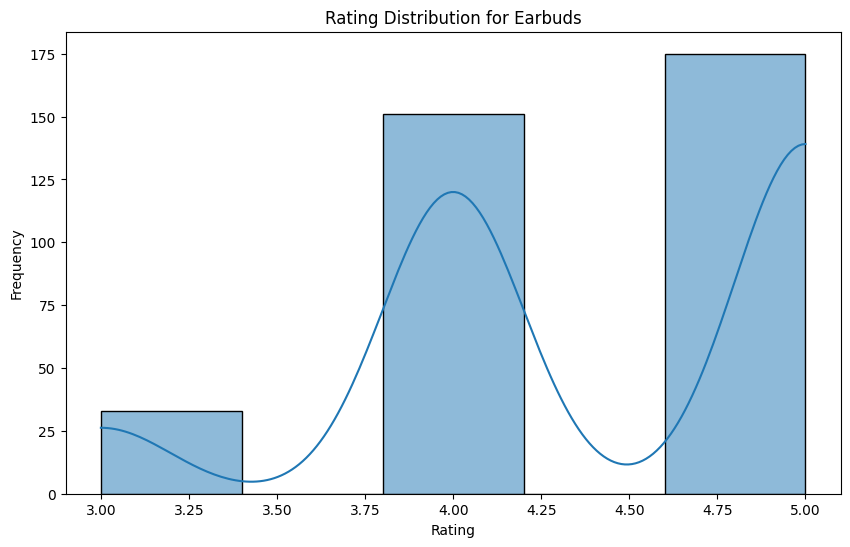

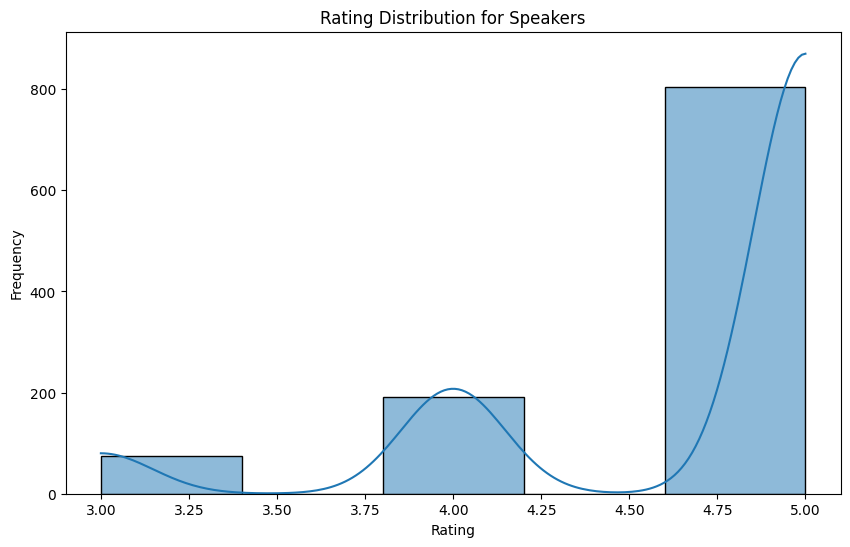

In [ ]:
# Plot rating distribution for Earbuds
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['product_category'] == 'Earbuds']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Earbuds')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot rating distribution for Speakers
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['product_category'] == 'Speaker']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Speakers')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Product-Specific Analysis for Beats Products**

In [ ]:
# Analyze neutral and negative sentiments for Beats Studio Buds
beats_earbuds_neutral_negative = beats_earbuds[beats_earbuds['sentiment_category'].isin(['Neutral', 'Negative'])]
print("Beats Studio Buds - Neutral and Negative Reviews:")
print(beats_earbuds_neutral_negative[['rating', 'content']].head())

# Analyze neutral and negative sentiments for Beats Pill
beats_speakers_neutral_negative = beats_speakers[beats_speakers['sentiment_category'].isin(['Neutral', 'Negative'])]
print("\nBeats Pill - Neutral and Negative Reviews:")
print(beats_speakers_neutral_negative[['rating', 'content']].head())

Beats Studio Buds - Neutral and Negative Reviews:
      rating                                            content
1299       5  I had a set of air pod pros that began to ratt...
1302       4  I have no problem with beat headphones I just ...
1308       4  They are comfortable for long hours listening ...
1309       4  Saw these on TV and decided to order for my wi...
1317       4  If you have small ears, these are not for you....

Beats Pill - Neutral and Negative Reviews:
     rating                                            content
777       5  Excelente compra, gran sonido y duración de la...
787       5                                           Buenardo
789       5       This thing hits you will not be disappointed
806       5                                          Excelente


**Creating a word cloud to visualize common words in the review text.**

In [ ]:
# Word cloud of review text
from wordcloud import WordCloud

In [ ]:
# Combine all review text into a single string
all_reviews = ' '.join(df_reviews['content'].dropna())

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)


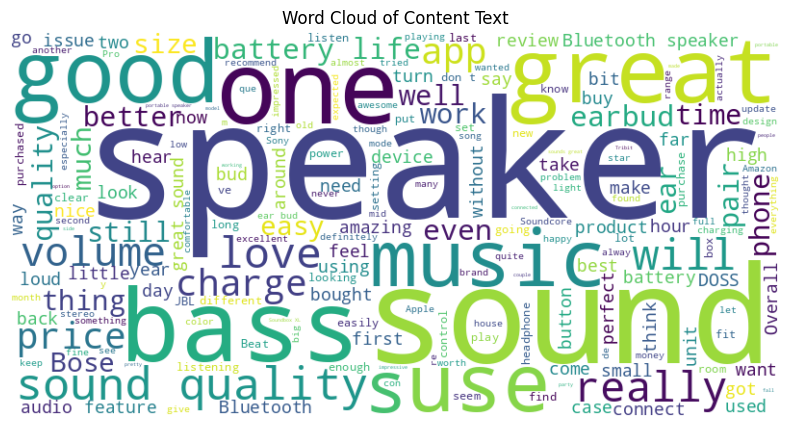

In [ ]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Text')
plt.show()

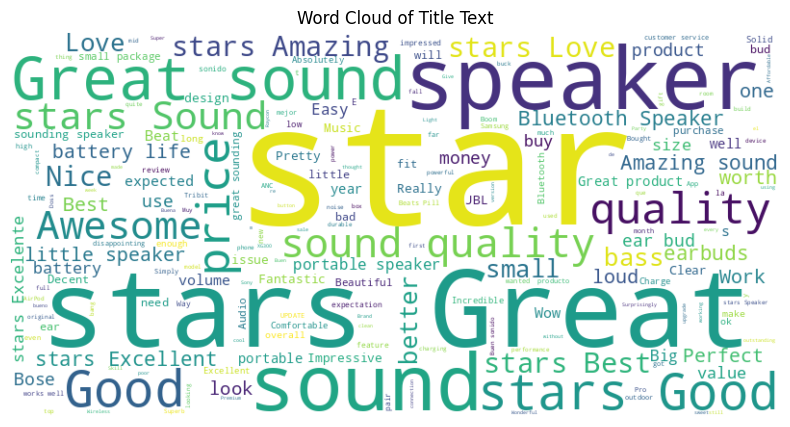

In [ ]:
all_titles = ' '.join(df_reviews['title'].dropna())
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Text')
plt.show()

**Weighted Word Clouds for Product attributes**

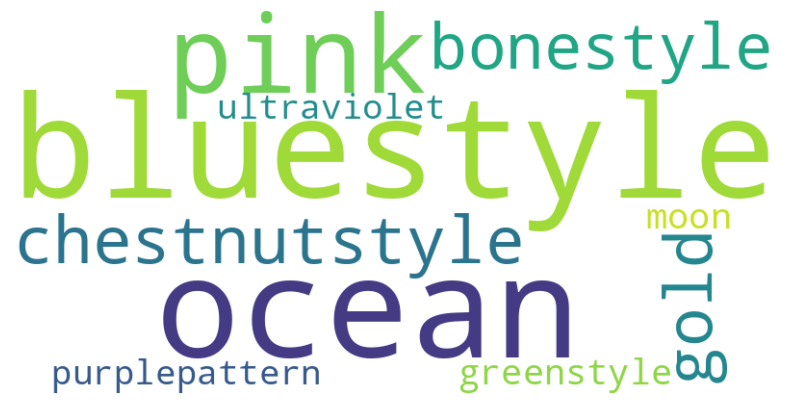

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(df_reviews['product_attributes'])

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=10, prefer_horizontal=0.7)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save the New columns DataFrame to a CSV file
df_reviews.to_csv('/content/modified_beats_reviews.csv', index=False)